In [1]:
# Basic Libraries
import pandas as pd
import numpy as np

# Text Preprocessing and Feature Extraction
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning Models and Evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
# Load the dataset
data = pd.read_csv('train.csv')

# Selecting only text and label columns
texts = data['text']
labels = data['label']

# Splitting into training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42, stratify=labels)

print(f"Training data size: {len(X_train)}")
print(f"Testing data size: {len(X_test)}")


Training data size: 9668
Testing data size: 2418


In [5]:
# Convert text data to TF-IDF features
vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2), stop_words='english')
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

print(f"TF-IDF Matrix shape (training): {X_train_tfidf.shape}")
print(f"TF-IDF Matrix shape (testing): {X_test_tfidf.shape}")


TF-IDF Matrix shape (training): (9668, 5000)
TF-IDF Matrix shape (testing): (2418, 5000)


In [7]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

# Predict on Test Data
y_pred = model.predict(X_test_tfidf)


Accuracy: 99.09%

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1228
           1       0.99      0.99      0.99      1190

    accuracy                           0.99      2418
   macro avg       0.99      0.99      0.99      2418
weighted avg       0.99      0.99      0.99      2418



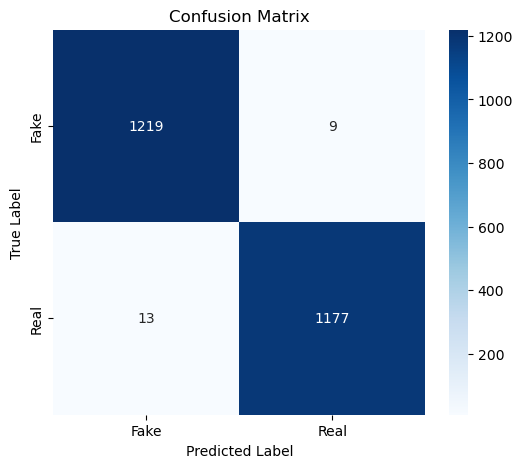

In [9]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plotting Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Fake', 'Real'], yticklabels=['Fake', 'Real'])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()


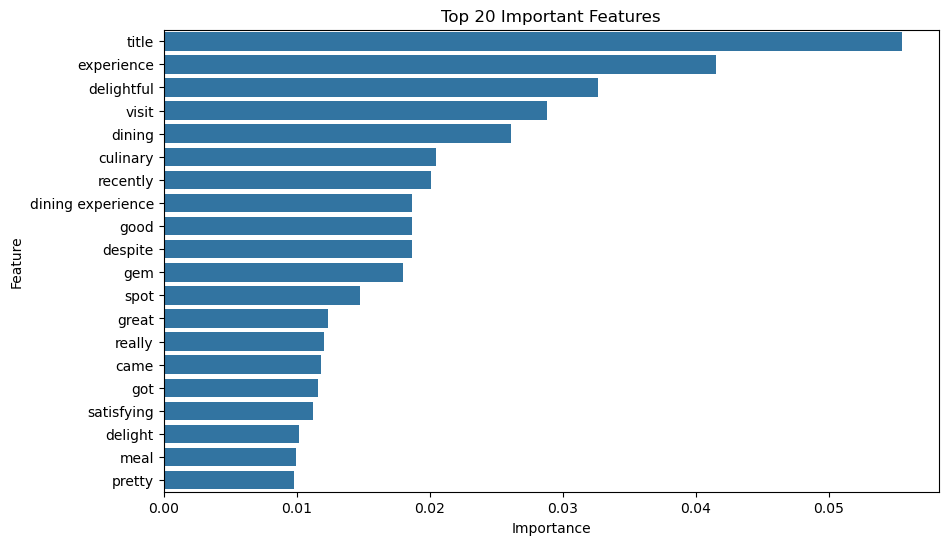

In [11]:
# Extracting feature importance from Random Forest
importances = model.feature_importances_
feature_names = vectorizer.get_feature_names_out()
feature_importances = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False).head(20)

# Plotting top 20 important features
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importances, x='Importance', y='Feature')
plt.title("Top 20 Important Features")
plt.show()
